# os.listdir  vs  glob.glob

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [71]:
import numpy  as np
import os
import glob 
import re
from matplotlib import pyplot as plt
import cv2

from PIL import Image

import torch
from torch import nn, optim
from torch.utils.data import (Dataset, DataLoader, TensorDataset)
from tqdm import tqdm_notebook as tqdm
import tqdm
from torchvision.datasets import FashionMNIST
from torchvision import transforms

## osを使用する場合

In [2]:
path = './dog_cat/' 
flist = os.listdir(path)

In [3]:
flist

['dog_10.jpg',
 'dog_9.jpg',
 '.DS_Store',
 'dog_8.jpg',
 'cat_10.jpg',
 'cat_8.jpg',
 'cat_9.jpg',
 'cat_1.jpg',
 'cat_2.jpg',
 'cat_3.jpg',
 'cat_7.jpg',
 'cat_6.jpg',
 'cat_4.jpg',
 'cat_5.jpg',
 'dog_6.jpg',
 'dog_7.jpg',
 'dog_5.jpg',
 'dog_4.jpg',
 'dog_1.jpg',
 'dog_3.jpg',
 'dog_2.jpg']

## globを使用する場合

In [4]:
img_list = glob.glob(path + '/*' + ".jpg")

In [5]:
img_list 

['./dog_cat/dog_10.jpg',
 './dog_cat/dog_9.jpg',
 './dog_cat/dog_8.jpg',
 './dog_cat/cat_10.jpg',
 './dog_cat/cat_8.jpg',
 './dog_cat/cat_9.jpg',
 './dog_cat/cat_1.jpg',
 './dog_cat/cat_2.jpg',
 './dog_cat/cat_3.jpg',
 './dog_cat/cat_7.jpg',
 './dog_cat/cat_6.jpg',
 './dog_cat/cat_4.jpg',
 './dog_cat/cat_5.jpg',
 './dog_cat/dog_6.jpg',
 './dog_cat/dog_7.jpg',
 './dog_cat/dog_5.jpg',
 './dog_cat/dog_4.jpg',
 './dog_cat/dog_1.jpg',
 './dog_cat/dog_3.jpg',
 './dog_cat/dog_2.jpg']

# イメージのロード、配列化、リサイズ、データセット

In [31]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        dog_img = Image.open(img)
        dog_img = np.asarray(dog_img)
        dog_img = cv2.resize(dog_img, (224,224))
        dog_img_array = np.concatenate([dog_img_array, dog_img[np.newaxis,:,:,:]], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        cat_img = Image.open(img)
        cat_img = np.asarray(cat_img)
        cat_img = cv2.resize(cat_img, (224,224))
        cat_img_array = np.concatenate([cat_img_array, cat_img[np.newaxis,:,:,:]], axis = 0)
        

In [32]:
img[:13]

'./dog_cat/dog'

In [33]:
dog_img_array.shape

(20, 224, 224, 3)

In [34]:
cat_img_array.shape

(20, 224, 224, 3)

In [36]:
cat_img_array[0]

array([[[221., 207., 206.],
        [223., 208., 210.],
        [222., 207., 212.],
        ...,
        [197., 188., 191.],
        [196., 186., 189.],
        [194., 185., 188.]],

       [[222., 208., 205.],
        [222., 208., 207.],
        [222., 207., 210.],
        ...,
        [194., 185., 188.],
        [197., 188., 191.],
        [195., 186., 189.]],

       [[222., 209., 203.],
        [221., 207., 204.],
        [221., 207., 206.],
        ...,
        [197., 188., 191.],
        [194., 185., 188.],
        [197., 188., 191.]],

       ...,

       [[116.,  94.,  97.],
        [ 97.,  76.,  78.],
        [ 68.,  48.,  52.],
        ...,
        [230., 210., 211.],
        [231., 210., 209.],
        [231., 210., 209.]],

       [[106.,  88.,  88.],
        [ 89.,  74.,  74.],
        [ 70.,  57.,  56.],
        ...,
        [230., 212., 212.],
        [231., 211., 210.],
        [231., 211., 210.]],

       [[125., 115., 113.],
        [ 65.,  57.,  52.],
        [ 61.,  

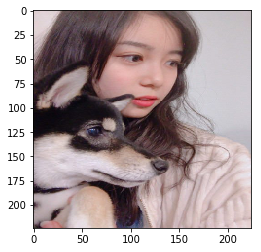

In [68]:
img = Image.open(img_list[0])
img2 = np.asarray(img)
img3 = cv2.resize(img2, (224,224))
imgnp = np.resize(img2, (1,224,224,3))

plt.imshow(img3)

In [70]:
img3

array([[[221, 207, 206],
        [223, 208, 210],
        [222, 207, 212],
        ...,
        [197, 188, 191],
        [196, 186, 189],
        [194, 185, 188]],

       [[222, 208, 205],
        [222, 208, 207],
        [222, 207, 210],
        ...,
        [194, 185, 188],
        [197, 188, 191],
        [195, 186, 189]],

       [[222, 209, 203],
        [221, 207, 204],
        [221, 207, 206],
        ...,
        [197, 188, 191],
        [194, 185, 188],
        [197, 188, 191]],

       ...,

       [[116,  94,  97],
        [ 97,  76,  78],
        [ 68,  48,  52],
        ...,
        [230, 210, 211],
        [231, 210, 209],
        [231, 210, 209]],

       [[106,  88,  88],
        [ 89,  74,  74],
        [ 70,  57,  56],
        ...,
        [230, 212, 212],
        [231, 211, 210],
        [231, 211, 210]],

       [[125, 115, 113],
        [ 65,  57,  52],
        [ 61,  55,  49],
        ...,
        [232, 214, 213],
        [233, 213, 212],
        [233, 213, 212]]

In [69]:
imgnp

array([[[[221, 207, 206],
         [221, 207, 207],
         [222, 208, 208],
         ...,
         [105,  87,  77],
         [109,  86,  78],
         [111,  86,  79]],

        [[114,  85,  81],
         [116,  87,  83],
         [119,  91,  87],
         ...,
         [196, 191, 187],
         [196, 191, 187],
         [196, 191, 187]],

        [[193, 189, 190],
         [193, 189, 190],
         [193, 189, 190],
         ...,
         [ 98,  73,  79],
         [ 98,  72,  81],
         [ 96,  73,  81]],

        ...,

        [[ 69,  58,  66],
         [ 60,  49,  57],
         [ 43,  32,  40],
         ...,
         [211, 167, 156],
         [209, 165, 154],
         [208, 164, 153]],

        [[213, 165, 155],
         [212, 164, 154],
         [211, 163, 153],
         ...,
         [ 79,  62,  70],
         [ 76,  59,  67],
         [ 79,  62,  72]],

        [[ 96,  71,  77],
         [ 79,  54,  60],
         [ 82,  59,  65],
         ...,
         [172, 132, 124],
        

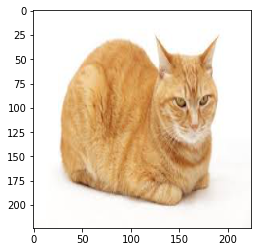

In [43]:
plt.imshow(dog_img_array[6].astype(np.int))

# パイトーチを使ってみる。

In [270]:
#  (N、C、H、W)形式のTensorを(N, C*H*W)に引き伸ばす層
# 畳み込み層の出力をMLPに渡す際に必要
class FlattenLayer(nn.Module):
    def forward(self, x):
        sizes = x.size()
        return x.view(sizes[0], -1)

In [279]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# ImageFolder関数を使用してDatasetを作成する
train_imgs = ImageFolder(
    "train/",
    transform=transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor()]
))
test_imgs = ImageFolder(
    "test/",
    transform=transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor()]
))

# DataLoaderを作成
train_loader = DataLoader(
    train_imgs, batch_size=5, shuffle=True)
test_loader = DataLoader(
    test_imgs, batch_size=5, shuffle=False)

In [280]:
print(train_imgs.classes)

['cat', 'dog']


In [281]:
print(train_imgs.class_to_idx)

{'cat': 0, 'dog': 1}


In [274]:
from torchvision import models

# 事前学習済みのresnet18をロード
net = models.resnet18(pretrained=True)

# すべてのパラメータを微分対象外にする
for p in net.parameters():
    p.requires_grad=False
    
# 最後の線形層を付け替える
fc_input_dim = net.fc.in_features
net.fc = nn.Linear(fc_input_dim, 2)

In [275]:
def eval_net(net, data_loader, device="cpu"):
    # DropoutやBatchNormを無効化
    net.eval()
    ys = []
    ypreds = []
    for x, y in data_loader:
        # toメソッドで計算を実行するデバイスに転送する
        x = x.to(device)
        y = y.to(device)
        # 確率が最大のクラスを予測(リスト2.14参照)
        # ここではforward（推論）の計算だけなので自動微分に
        # 必要な処理はoffにして余計な計算を省く
        with torch.no_grad():
            _, y_pred = net(x).max(1)
        ys.append(y)
        ypreds.append(y_pred)
    # ミニバッチごとの予測結果などを1つにまとめる
    ys = torch.cat(ys)
    ypreds = torch.cat(ypreds)
    # 予測精度を計算
    acc = (ys == ypreds).float().sum() / len(ys)
    return acc.item()

def train_net(net, train_loader, test_loader,
              only_fc=True,
              optimizer_cls=optim.Adam,
              loss_fn=nn.CrossEntropyLoss(),
              n_iter=10, device="cpu"):
    train_losses = []
    train_acc = []
    val_acc = []
    if only_fc:
        # 最後の線形層のパラメータのみを、
        # optimizerに渡す
        optimizer = optimizer_cls(net.fc.parameters())
    else:
        optimizer = optimizer_cls(net.parameters())
    for epoch in range(n_iter):
        running_loss = 0.0
        # ネットワークを訓練モードにする
        net.train()
        n = 0
        n_acc = 0
        # 非常に時間がかかるのでtqdmを使用してプログレスバーを出す
        for i, (xx, yy) in tqdm.tqdm(enumerate(train_loader),
            total=len(train_loader)):
            xx = xx.to(device)
            yy = yy.to(device)
            h = net(xx)
            loss = loss_fn(h, yy)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            n += len(xx)
            _, y_pred = h.max(1)
            n_acc += (yy == y_pred).float().sum().item()
        train_losses.append(running_loss / i)
        # 訓練データの予測精度
        train_acc.append(n_acc / n)
        # 検証データの予測精度
        val_acc.append(eval_net(net, test_loader, device))
        # このepochでの結果を表示
        print(epoch, train_losses[-1], train_acc[-1],
              val_acc[-1], flush=True)

In [276]:
train_net(net, train_loader, test_loader, n_iter=20)



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.48it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.38it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.35it/s]

100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

0 0.941779096921285 0.5625 0.5




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.15it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.18it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.11it/s]

100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

1 0.8957405885060629 0.625 0.5




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.34it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.23it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.25it/s]

100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

2 0.6765554149945577 0.8125 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.35it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.34it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.26it/s]

100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

3 0.6726007660230001 0.875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.44it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.42it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.33it/s]

100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

4 0.7350985606511434 0.875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.40it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.42it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.35it/s]

100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

5 0.592640886704127 0.9375 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.11it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.16it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.17it/s]

100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

6 0.6154435873031616 0.6875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.37it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.27it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.31it/s]

100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

7 0.6153316299120585 0.6875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.45it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.45it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.32it/s]

100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

8 0.709654817978541 0.875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.10it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.17it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.23it/s]

100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

9 0.7061067422231039 0.875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.42it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.39it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.29it/s]

100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

10 0.38342344760894775 0.9375 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.46it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.37it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.39it/s]

100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

11 0.4738999307155609 0.75 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.16it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.24it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.31it/s]

100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

12 0.7466731866200765 0.6875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.51it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.50it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.41it/s]

100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

13 0.6676429063081741 0.875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.16it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.27it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.32it/s]

100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

14 0.5602225412925085 0.875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.48it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.40it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.43it/s]

100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

15 0.5149581879377365 0.875 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.50it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.40it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.41it/s]

100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

16 0.4100014939904213 0.9375 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.49it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.49it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.35it/s]

100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

17 0.3855615307887395 0.9375 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.38it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.31it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.36it/s]

100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

18 0.33090513447920483 1.0 0.75




  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:01,  2.31it/s]

 50%|█████     | 2/4 [00:00<00:00,  2.32it/s]

 75%|███████▌  | 3/4 [00:01<00:00,  2.29it/s]

100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

19 0.5807773197690645 0.9375 0.75


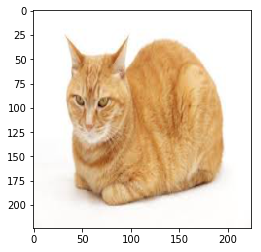

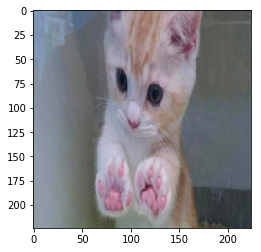

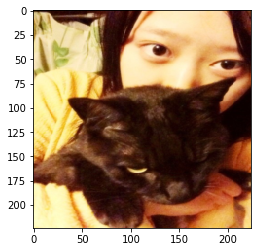

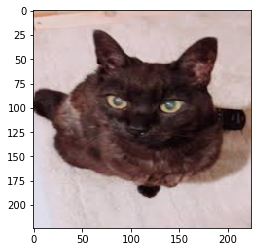

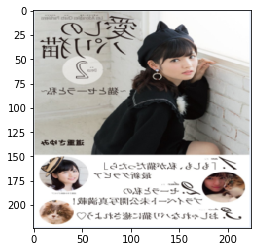

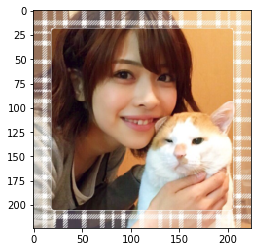

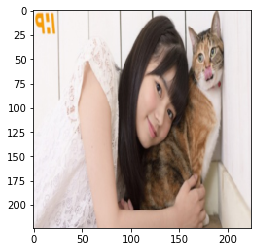

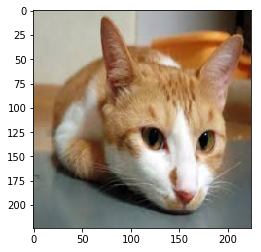

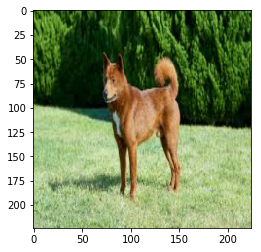

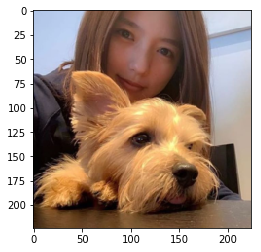

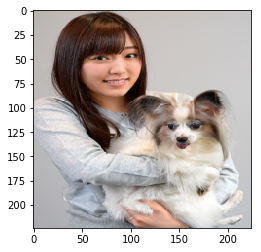

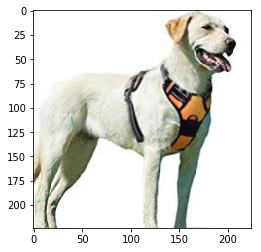

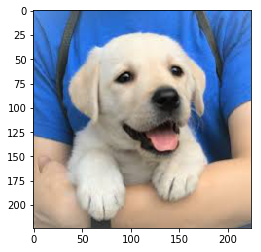

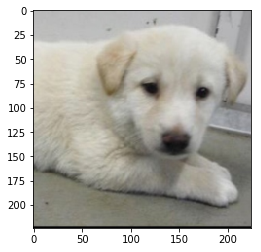

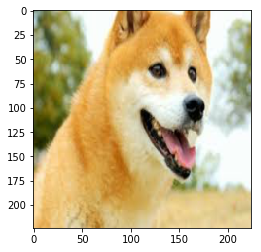

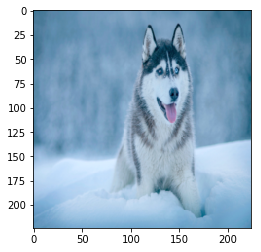

In [292]:
for i in range(len(train_imgs)):
    plt.imshow(train_loader.dataset[i][0].numpy().transpose(1,2,0))
    plt.show()

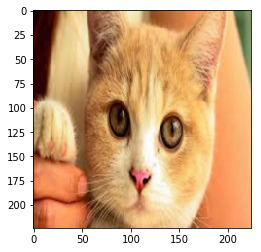

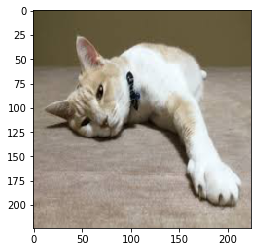

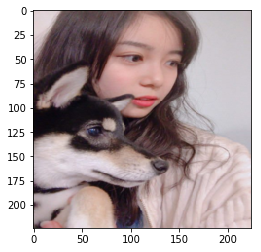

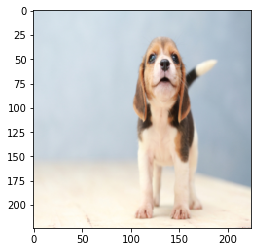

In [278]:
for i in range(len(test_imgs)):
    plt.imshow(test_imgs[i][0].numpy().transpose(1,2,0))
    plt.show()

全然予測しない。。。

# 【問題2】分類データセットに対するデータ拡張

In [306]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# ImageFolder関数を使用してDatasetを作成する
train_imgs = ImageFolder(
    "train/",
    transform=transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomRotation(30, resample=False, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),        
        transforms.RandomCrop(224),
        transforms.ToTensor()]
))
test_imgs = ImageFolder(
    "test/",
    transform=transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor()]
))

# DataLoaderを作成
train_loader = DataLoader(
    train_imgs, batch_size=8, shuffle=True)
test_loader = DataLoader(
    test_imgs, batch_size=2, shuffle=False)

In [307]:
print(train_imgs.classes)

['cat', 'dog']


In [308]:
print(train_imgs.class_to_idx)

{'cat': 0, 'dog': 1}


In [309]:
from torchvision import models

# 事前学習済みのresnet18をロード
net = models.resnet18(pretrained=True)

# すべてのパラメータを微分対象外にする
for p in net.parameters():
    p.requires_grad=False
    
# 最後の線形層を付け替える
fc_input_dim = net.fc.in_features
net.fc = nn.Linear(fc_input_dim, 2)

In [ ]:
def eval_net(net, data_loader, device="cpu"):
    # DropoutやBatchNormを無効化
    net.eval()
    ys = []
    ypreds = []
    for x, y in data_loader:
        # toメソッドで計算を実行するデバイスに転送する
        x = x.to(device)
        y = y.to(device)
        # 確率が最大のクラスを予測(リスト2.14参照)
        # ここではforward（推論）の計算だけなので自動微分に
        # 必要な処理はoffにして余計な計算を省く
        with torch.no_grad():
            _, y_pred = net(x).max(1)
        ys.append(y)
        ypreds.append(y_pred)
    # ミニバッチごとの予測結果などを1つにまとめる
    ys = torch.cat(ys)
    ypreds = torch.cat(ypreds)

    # 予測精度を計算
    acc = (ys == ypreds).float().sum() / len(ys)
    return acc.item()

def train_net(net, train_loader, test_loader,
              only_fc=True,
              optimizer_cls=optim.Adam,
              loss_fn=nn.CrossEntropyLoss(),
              n_iter=10, device="cpu"):
    train_losses = []
    train_acc = []
    val_acc = []
    if only_fc:
        # 最後の線形層のパラメータのみを、
        # optimizerに渡す
        optimizer = optimizer_cls(net.fc.parameters())
    else:
        optimizer = optimizer_cls(net.parameters())
    for epoch in range(n_iter):
        running_loss = 0.0
        # ネットワークを訓練モードにする
        net.train()
        n = 0
        n_acc = 0
        # 非常に時間がかかるのでtqdmを使用してプログレスバーを出す
        for i, (xx, yy) in tqdm.tqdm(enumerate(train_loader),
            total=len(train_loader)):
            xx = xx.to(device)
            yy = yy.to(device)
            h = net(xx)
            loss = loss_fn(h, yy)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            n += len(xx)
            _, y_pred = h.max(1)
            n_acc += (yy == y_pred).float().sum().item()
        train_losses.append(running_loss / i)
        # 訓練データの予測精度
        train_acc.append(n_acc / n)
        # 検証データの予測精度
        val_acc.append(eval_net(net, test_loader, device))
        # このepochでの結果を表示
        print(epoch, train_losses[-1], train_acc[-1],
              val_acc[-1], flush=True)

In [417]:
train_net(net, train_loader, test_loader, n_iter=20)



  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.39it/s]

100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
0 0.49120330810546875 0.875 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.51it/s]

100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
1 0.18350642547011375 0.9375 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.52it/s]

100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
2 0.06340625137090683 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.40it/s]

100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
3 0.058481574058532715 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.47it/s]

100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
4 0.06610999256372452 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.35it/s]

100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
5 0.10776162147521973 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.51it/s]

100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
6 0.059887342154979706 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.45it/s]

100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
7 0.24604379385709763 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.37it/s]

100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
8 0.06872343271970749 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.49it/s]

100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
9 0.07682065293192863 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.40it/s]

100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
10 0.0959572084248066 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.39it/s]

100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
11 0.04686766862869263 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.42it/s]

100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
12 0.1083766371011734 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.40it/s]

100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
13 0.06871947646141052 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.41it/s]

100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
14 0.04107329994440079 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.47it/s]

100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

[tensor([0, 0]), tensor([1, 1])]
tensor([0, 0, 1, 1])
15 0.029328294098377228 1.0 0.75




  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:00<00:00,  1.42it/s]

KeyboardInterrupt: 

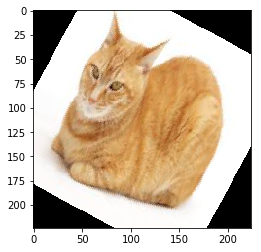

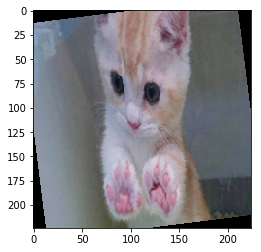

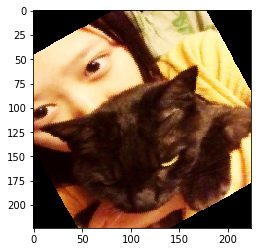

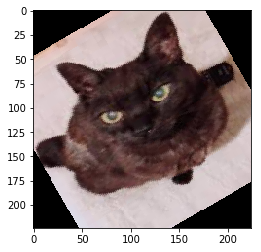

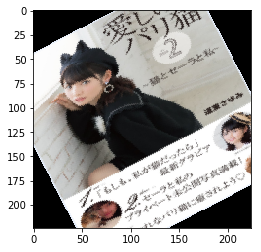

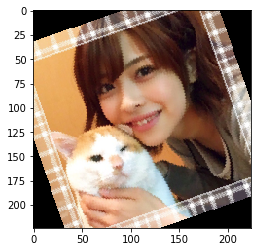

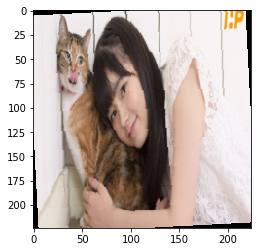

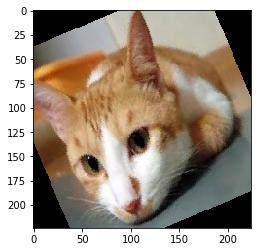

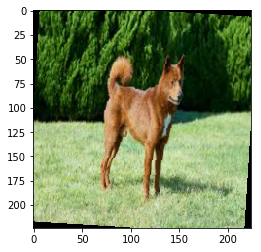

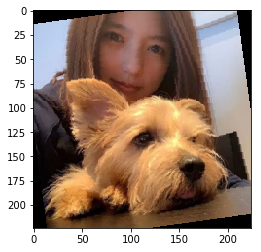

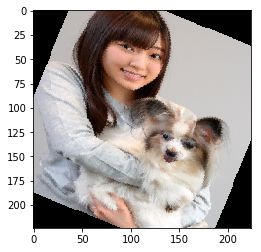

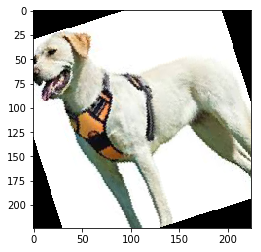

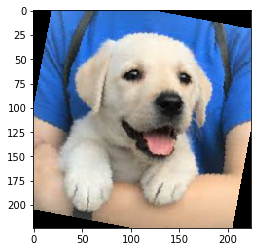

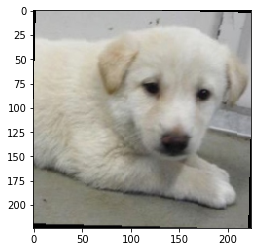

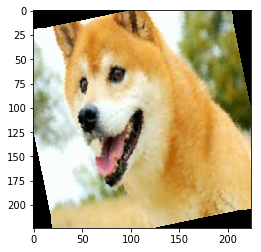

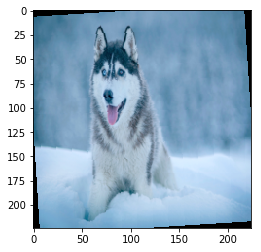

In [299]:
for i in range(len(train_imgs)):
    plt.imshow(train_loader.dataset[i][0].numpy().transpose(1,2,0))
    plt.show()

# 【問題3】物体検出データセットの用意

In [462]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [466]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [522]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [546]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={'format': 'pascal_voc', 'min_area': min_area, 'min_visibility': min_visibility, 'label_fields': ['category_id']})

### 画像１

In [547]:
import xml.etree.ElementTree as ET
tree = ET.parse('/Users/takahashiakira/Documents/DIC/diveintocode-ml/sprint19/train/dog/dog_3.xml')
root = tree.getroot()

In [548]:
image = cv2.imread('train/dog/dog_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [549]:
bound_box1 = []
for i in range(4):
    bound = root[6][4][i].text
    bound_box1.append(bound)

bound_box2 = []
for i in range(4):
    bound = root[7][4][i].text
    bound_box2.append(bound)
bound_box = [bound_box1, bound_box2]

In [550]:
category_id = [0,1]
category_id_to_name = {0:root[6][0].text, 1: root[7][0].text}

In [551]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': bound_box, 'category_id': category_id}

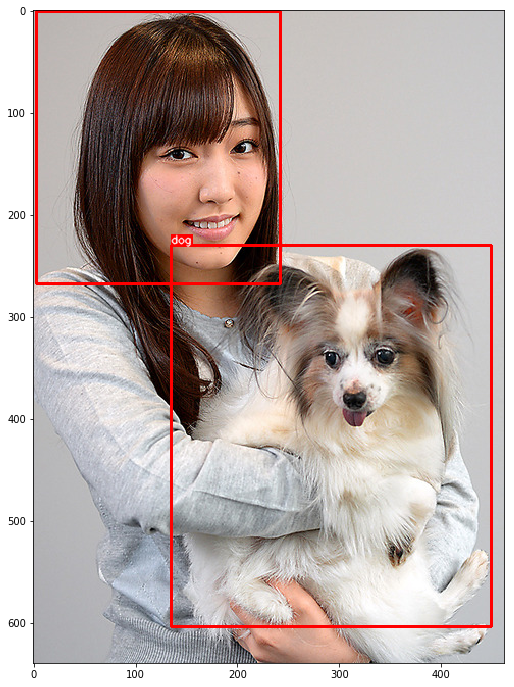

In [552]:
visualize(annotations, category_id_to_name)

### 画像2

In [553]:
import xml.etree.ElementTree as ET
tree = ET.parse('train/cat/cat_5.xml')
root = tree.getroot()

In [554]:
image = cv2.imread('train/cat/cat_5.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [555]:
bound_box1 = []
for i in range(4):
    bound = root[6][4][i].text
    bound_box1.append(bound)

bound_box2 = []
for i in range(4):
    bound = root[7][4][i].text
    bound_box2.append(bound)
    
bound_box3 = []
for i in range(4):
    bound = root[8][4][i].text
    bound_box3.append(bound)

bound_box4 = []
for i in range(4):
    bound = root[9][4][i].text
    bound_box4.append(bound)

bound_box5 = []
for i in range(4):
    bound = root[10][4][i].text
    bound_box5.append(bound)

bound_box = [bound_box1, bound_box2, bound_box3, bound_box4, bound_box5]

In [556]:
category_id = [0,0,1,1,1]
category_id_to_name = {0:root[6][0].text, 1: root[8][0].text}

In [557]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': bound_box, 'category_id': category_id}

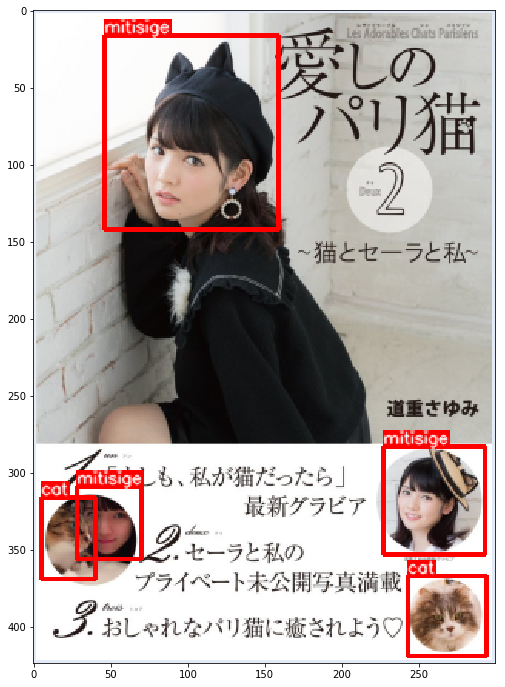

In [558]:
visualize(annotations, category_id_to_name)

In [559]:
aug = get_aug([CenterCrop(p=1, height=300, width=300)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# ハロプロの方々

In [261]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# ImageFolder関数を使用してDatasetを作成する
train_imgs = ImageFolder(
    "hello/train/",
    transform=transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor()]
))
test_imgs = ImageFolder(
    "hello/test/",
    transform=transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor()]
))

# DataLoaderを作成
train_loader = DataLoader(
    train_imgs, batch_size=10, shuffle=True)
test_loader = DataLoader(
    test_imgs, batch_size=5, shuffle=False)

In [262]:
print(train_imgs.classes)

['hukumura', 'sato']


In [263]:
print(train_imgs.class_to_idx)

{'hukumura': 0, 'sato': 1}


In [264]:
from torchvision import models

# 事前学習済みのresnet18をロード
net = models.resnet18(pretrained=True)

# すべてのパラメータを微分対象外にする
for p in net.parameters():
    p.requires_grad=False
    
# 最後の線形層を付け替える
fc_input_dim = net.fc.in_features
net.fc = nn.Linear(fc_input_dim, 2)

In [265]:
def eval_net(net, data_loader, device="cpu"):
    # DropoutやBatchNormを無効化
    net.eval()
    ys = []
    ypreds = []
    for x, y in data_loader:
        # toメソッドで計算を実行するデバイスに転送する
        x = x.to(device)
        y = y.to(device)
        # 確率が最大のクラスを予測(リスト2.14参照)
        # ここではforward（推論）の計算だけなので自動微分に
        # 必要な処理はoffにして余計な計算を省く
        with torch.no_grad():
            _, y_pred = net(x).max(1)
        ys.append(y)
        ypreds.append(y_pred)
    # ミニバッチごとの予測結果などを1つにまとめる
    ys = torch.cat(ys)
    ypreds = torch.cat(ypreds)
    # 予測精度を計算
    acc = (ys == ypreds).float().sum() / len(ys)
    return acc.item()

def train_net(net, train_loader, test_loader,
              only_fc=True,
              optimizer_cls=optim.Adam,
              loss_fn=nn.CrossEntropyLoss(),
              n_iter=10, device="cpu"):
    train_losses = []
    train_acc = []
    val_acc = []
    if only_fc:
        # 最後の線形層のパラメータのみを、
        # optimizerに渡す
        optimizer = optimizer_cls(net.fc.parameters())
    else:
        optimizer = optimizer_cls(net.parameters())
    for epoch in range(n_iter):
        running_loss = 0.0
        # ネットワークを訓練モードにする
        net.train()
        n = 0
        n_acc = 0
        # 非常に時間がかかるのでtqdmを使用してプログレスバーを出す
        for i, (xx, yy) in tqdm.tqdm(enumerate(train_loader),
            total=len(train_loader)):
            xx = xx.to(device)
            yy = yy.to(device)
            h = net(xx)
            loss = loss_fn(h, yy)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            n += len(xx)
            _, y_pred = h.max(1)
            n_acc += (yy == y_pred).float().sum().item()
        train_losses.append(running_loss / i)
        # 訓練データの予測精度
        train_acc.append(n_acc / n)
        # 検証データの予測精度
        val_acc.append(eval_net(net, test_loader, device))
        # このepochでの結果を表示
        print(epoch, train_losses[-1], train_acc[-1],
              val_acc[-1], flush=True)

In [340]:
test_loader

tensor([0, 0])
tensor([0, 1])


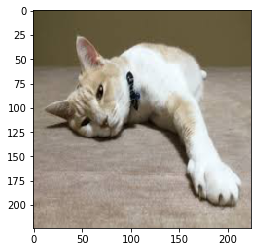

tensor([1, 1])
tensor([1, 1])


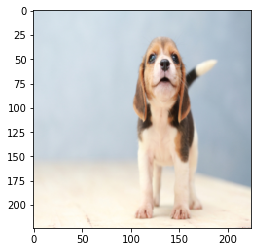

[tensor([[ 0.4389, -0.8516],
         [-0.3046,  0.7725]], grad_fn=<AddmmBackward>),
 tensor([[-0.5724, -0.2831],
         [-0.9654, -0.2656]], grad_fn=<AddmmBackward>)]

In [411]:
preds = []
for i in test_loader:
    print(i[1])
    a = net(i[0])
    print(a.max(1)[1])
    preds.append(a)
    plt.imshow(i[0][1].numpy().transpose(1,2,0))
    plt.show()
preds

In [388]:
preds[0].max(1)

(tensor([0.4389, 0.7725], grad_fn=<MaxBackward0>), tensor([0, 1]))

In [266]:
train_net(net, train_loader, test_loader, n_iter=20)



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.90it/s]

 40%|████      | 2/5 [00:01<00:01,  1.85it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.83it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.79it/s]

100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

0 0.8802544474601746 0.5454545454545454 0.6666666865348816




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.87it/s]

 40%|████      | 2/5 [00:01<00:01,  1.87it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.87it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.84it/s]

100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

1 0.7760637253522873 0.6818181818181818 0.6666666865348816




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.78it/s]

 40%|████      | 2/5 [00:01<00:01,  1.84it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.79it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.77it/s]

100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

2 0.7039286121726036 0.6818181818181818 0.6666666865348816




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.74it/s]

 40%|████      | 2/5 [00:01<00:01,  1.74it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.76it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.79it/s]

100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

3 0.598207987844944 0.6818181818181818 0.6666666865348816




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.68it/s]

 40%|████      | 2/5 [00:01<00:01,  1.75it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.78it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.77it/s]

100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

4 0.6569962427020073 0.7727272727272727 0.6666666865348816




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.81it/s]

 40%|████      | 2/5 [00:01<00:01,  1.80it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.85it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.87it/s]

100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

5 0.4540802612900734 0.8181818181818182 0.6666666865348816




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.76it/s]

 40%|████      | 2/5 [00:01<00:01,  1.77it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.79it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.83it/s]

100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

6 0.8182087764143944 0.7727272727272727 0.6666666865348816




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.81it/s]

 40%|████      | 2/5 [00:01<00:01,  1.80it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.82it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.82it/s]

100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

7 0.3561001196503639 1.0 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.89it/s]

 40%|████      | 2/5 [00:01<00:01,  1.86it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.81it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.79it/s]

100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

8 0.7562917172908783 0.6363636363636364 0.6666666865348816




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.83it/s]

 40%|████      | 2/5 [00:01<00:01,  1.82it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.81it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.80it/s]

100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

9 0.5545251369476318 0.8181818181818182 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.78it/s]

 40%|████      | 2/5 [00:01<00:01,  1.81it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.79it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.80it/s]

100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

10 0.729349173605442 0.8636363636363636 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.79it/s]

 40%|████      | 2/5 [00:01<00:01,  1.80it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.79it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.78it/s]

100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

11 0.34638670831918716 0.9545454545454546 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.86it/s]

 40%|████      | 2/5 [00:01<00:01,  1.85it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.81it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.82it/s]

100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

12 0.348100271075964 0.9545454545454546 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.84it/s]

 40%|████      | 2/5 [00:01<00:01,  1.89it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.91it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.85it/s]

100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

13 0.3875449672341347 0.9090909090909091 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.75it/s]

 40%|████      | 2/5 [00:01<00:01,  1.76it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.76it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.78it/s]

100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

14 0.39870554953813553 0.8181818181818182 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.72it/s]

 40%|████      | 2/5 [00:01<00:01,  1.74it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.80it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.80it/s]

100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

15 0.33116263896226883 0.8636363636363636 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.74it/s]

 40%|████      | 2/5 [00:01<00:01,  1.78it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.78it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.80it/s]

100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

16 0.3511483110487461 0.9090909090909091 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.90it/s]

 40%|████      | 2/5 [00:01<00:01,  1.87it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.91it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.88it/s]

100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

17 0.3745548538863659 0.9090909090909091 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.73it/s]

 40%|████      | 2/5 [00:01<00:01,  1.78it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.84it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.84it/s]

100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

18 0.3413044847548008 0.9090909090909091 0.8333333134651184




  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:02,  1.89it/s]

 40%|████      | 2/5 [00:01<00:01,  1.88it/s]

 60%|██████    | 3/5 [00:01<00:01,  1.91it/s]

 80%|████████  | 4/5 [00:02<00:00,  1.87it/s]

100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

19 0.3170436155050993 0.8636363636363636 0.6666666865348816


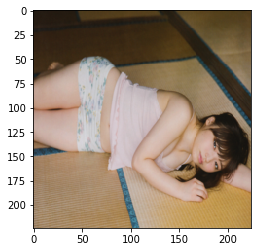

In [267]:
plt.imshow(train_imgs[0][0].numpy().transpose(1,2,0))

結構精度出てきた。